## OCT - VGG16

In [1]:
#Importing Necessary Libraries.
from PIL import Image
import numpy as np
import pandas as pd 
import random
import os
#import cv2

import matplotlib.pyplot as plt
import tensorflow as tf
from pathlib import Path

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3500)])
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
        print(e)
    
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras_lr_finder import LRFinder
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.python.keras import backend
from tensorflow.python.keras.applications import imagenet_utils
from tensorflow.python.keras.preprocessing import image

from sklearn.utils import class_weight 

print(tf.__version__)
tf.config.list_physical_devices('GPU')

1 Physical GPUs, 1 Logical GPUs
2.2.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
database_directory = "/home/maia/Documents/Universidade/Universidade/UNIVERSIDADE/EXPERIMENTO/0DATASETS/OCT/OCT/"
res_list = [224]
image_size=(224,224,3)
out_dir = "/home/maia/Documents/Universidade/Universidade/UNIVERSIDADE/EXPERIMENTO/1TRAIN/VGG_NET/OCT/OUT/"
max_epochs = 50

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
def plot_and_save(history, modelName, path):
    fig, axs = plt.subplots(2, figsize=(18, 10))
    axs[0].set_ylim(0,1)
    axs[0].plot(range(1,max_epochs+1), history['accuracy'], 'o-')
    axs[0].plot(range(1,max_epochs+1), history['val_accuracy'], 'o-')
    axs[0].set_title('model accuracy')
    axs[0].set_ylabel('accuracy')
    axs[0].set_xlabel('epoch')
    axs[0].legend(['train', 'validation'], loc='lower left')
    axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
    axs[0].set_xticks(range(1,max_epochs+1))

    # "Loss"
    axs[1].plot(range(1,max_epochs+1), history['loss'], 'o-')
    axs[1].plot(range(1,max_epochs+1),history['val_loss'], 'o-')
    axs[1].set_title('model loss')
    axs[1].set_ylabel('loss')
    axs[1].set_xlabel('epoch')
    axs[1].legend(['train', 'validation'], loc='upper left')
    axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))
    axs[1].set_xticks(range(1,max_epochs+1))
    
    plt.savefig(path+  modelName +'.png')
    plt.show()
    plt.draw()
#plot_and_save(history, modelName)

In [ ]:
def step_decay_schedule(initial_lr=1e-3, decay_factor=0.75, step_size=10):
    def schedule(epoch):
        return initial_lr * (decay_factor ** np.floor(epoch/step_size))
    return LearningRateScheduler(schedule)


def train(res, train_generator, test_generator, class_weights):
    #OUTPUT PATH
    modelName = 'TRUE_MODEL'+str(res)
    Path.mkdir(Path(out_dir+modelName), parents=True, exist_ok=True)
    out_run = out_dir+modelName+"/"
    
    #COMPILE AND TRAIN
    model = tf.keras.applications.VGG16(input_shape=(res, res, 3), include_top=True,weights = None, classes=4)
    mc = keras.callbacks.ModelCheckpoint(out_run + modelName+'_w{epoch:05d}.h5', save_weights_only=False, period=5)
    optimizer = tf.keras.optimizers.Adagrad()
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    history = model.fit(x=train_generator,epochs=max_epochs,validation_data=test_generator, callbacks=[mc], shuffle=True)
    
    #SAVE HISTORY AND PLOT
    np.save(out_run + modelName +'my_history.npy',history.history)
    plot_model(model, to_file= out_run + modelName+'_arc.png',expand_nested=True, show_shapes=True)
    plot_and_save(history.history, modelName, out_run)

for res in res_list:
    h_input = res
    w_input = res
    batch_size = 16
    

    train_datagen = ImageDataGenerator(horizontal_flip=True)
    test_datagen = ImageDataGenerator()
    train_generator = train_datagen.flow_from_directory(
            database_directory+"train",
            target_size=(h_input, w_input),
            batch_size=batch_size,
            class_mode='categorical')

    # this is a similar generator, for validation data
    test_generator = test_datagen.flow_from_directory(
            database_directory+"test",
            target_size=(h_input, w_input),
            batch_size=batch_size,
            class_mode='categorical')
    
    class_weights = class_weight.compute_class_weight(
           'balanced',
            np.unique(train_generator.classes), 
            train_generator.classes)
    class_weights = dict(enumerate(class_weights))

    
    train(res, train_generator, test_generator, class_weights)

Found 108309 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


/home/maia/anaconda3/envs/MST_TRAIN/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass classes=[0 1 2 3], y=[0 0 0 ... 3 3 3] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Epoch 1/50
6770/6770 [==============================] - 2267s 335ms/step - loss: 0.4650 - accuracy: 0.8381 - val_loss: 0.5401 - val_accuracy: 0.7960
Epoch 2/50
1981/6770 [=======>......................] - ETA: 27:44 - loss: 0.2967 - accuracy: 0.9009

In [5]:
plot_and_save(history.history, modelName, out_run)

NameError: name 'history' is not defined

In [30]:
data = np.load('/home/maia/Documents/Universidade/Universidade/UNIVERSIDADE/EXPERIMENTO/1TRAIN/VGG_NET/OCT/OUT/VGG_res_00010e5_75224/VGG_res_00010e5_75224my_history.npy', allow_pickle=True)

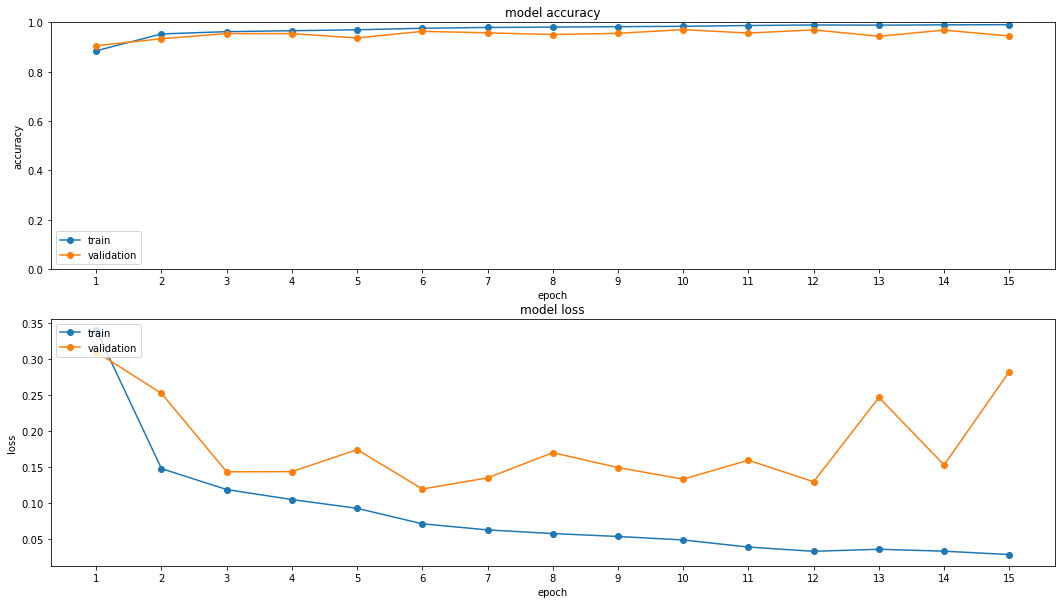

<Figure size 432x288 with 0 Axes>

In [39]:
plot_and_save(data.item(), "VGG_res_00010e5_75224", out_dir)

## Blocks

In [ ]:
layers = VersionAwareLayers()

def teste(
    include_top=True,
    input_tensor=None,
    input_shape=None,
    classes=1000,
    classifier_activation='softmax',
    blocks = 5):

    input_shape = imagenet_utils.obtain_input_shape(
      input_shape,
      default_size=224,
      min_size=32,
      data_format=backend.image_data_format(),
      require_flatten=include_top,
      weights=weights)

    if input_tensor is None:
        img_input = layers.Input(shape=input_shape)
    else:
        if not backend.is_keras_tensor(input_tensor):
            img_input = layers.Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor

    if(blocks >= 1):
        # Block 1
        x = layers.Conv2D(
        64, (3, 3), activation='relu', padding='same', name='block1_conv1')(
        img_input)
        x = layers.Conv2D(
        64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
        x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    if(blocks >= 2):
        # Block 2
        x = layers.Conv2D(
        128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
        x = layers.Conv2D(
        128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
        x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    if(blocks >= 3):
        # Block 3
        x = layers.Conv2D(
        256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
        x = layers.Conv2D(
        256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
        x = layers.Conv2D(
        256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
        x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    if(blocks >= 4):
        # Block 4
        x = layers.Conv2D(
        512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
        x = layers.Conv2D(
        512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
        x = layers.Conv2D(
        512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
        x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    if(blocks >= 5):
        # Block 5
        x = layers.Conv2D(
        512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
        x = layers.Conv2D(
        512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
        x = layers.Conv2D(
        512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
        x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)
        
    if include_top:
        # Classification block
        #x = layers.Flatten(name='flatten')(x)
        x = layers.GlobalAveragePooling2D()(x)
        x = layers.Dense(4096, activation='relu', name='fc1')(x)
        x = layers.Dense(4096, activation='relu', name='fc2')(x)

        imagenet_utils.validate_activation(classifier_activation, weights)
        x = layers.Dense(classes, activation=classifier_activation,
                         name='predictions')(x)

    if input_tensor is not None:
        inputs = layer_utils.get_source_inputs(input_tensor)
    else:
        inputs = img_input
    model = training.Model(inputs, x, name='vgg16')

    return model